# TEG test

Time expanded graph test

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

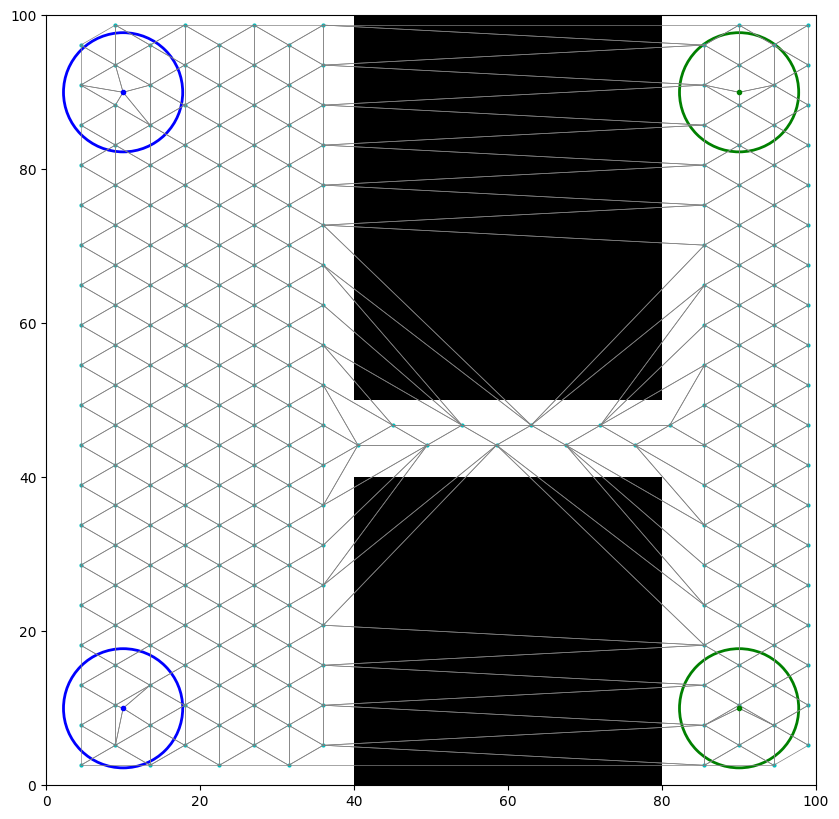

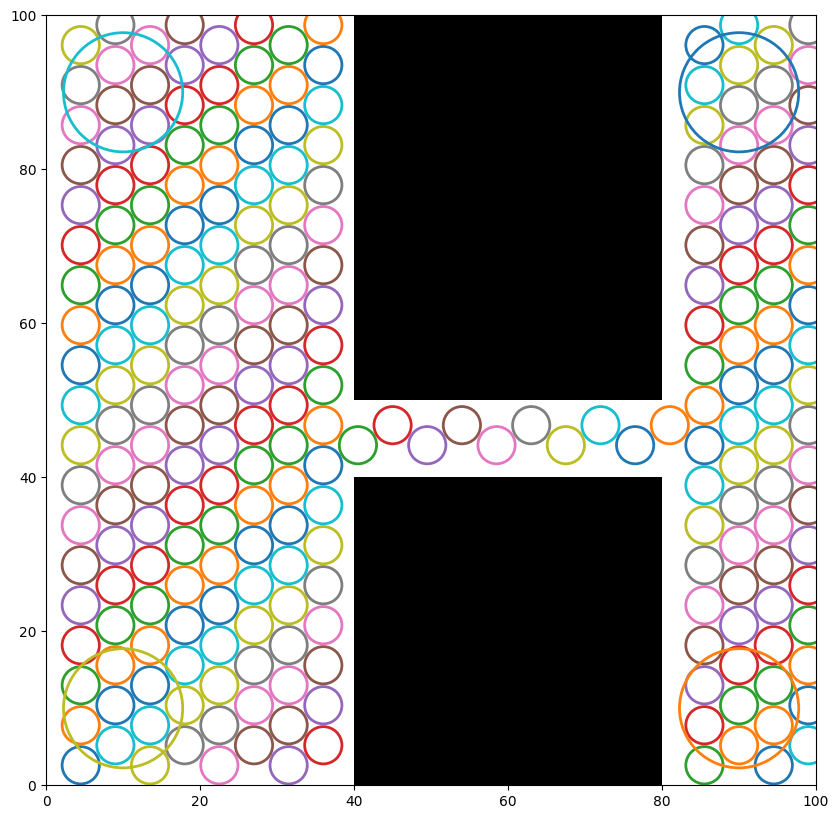

In [2]:
import pickle

from swarm_prm.solvers.utils.gaussian_prm import *
from swarm_prm.envs.map import Map, Obstacle 
from swarm_prm.envs.instance import Instance

roadmap = Map(100, 100)
safety_radius = 2 
pos = np.array([50, 50])
obstacles  = [
    Obstacle(None, "POLYGON", [(40, 0), (40, 40), (80, 40), (80, 0)]),
    Obstacle(None, "POLYGON", [(40, 100), (40, 50), (80, 50), (80, 100)])
]
num_samples = 100 
for obs in obstacles:
    roadmap.add_obstacle(obs)
# fig, ax = roadmap.visualize()
start_mean = np.random.rand(2) * 100
goal_mean = np.random.rand(2) * 100

# Agent config
num_agent = 50 
agent_radius = 2
sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
hex_radius = 3
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 10], [10, 90]])
goals = np.array([[90, 90], [90, 10]])

starts_weight = np.array([.5, .5])
goals_weight = np.array([.5, .5])

g_starts = [GaussianGraphNode(start, np.identity(2)*10) for start in starts]
g_goals = [GaussianGraphNode(goal, np.identity(2)*10) for goal in goals]

instance = Instance(roadmap, g_starts, g_goals, starts_weight, goals_weight, num_agent)

gaussian_prm = GaussianPRM(instance, num_samples, safety_radius=safety_radius,
                           hex_radius=hex_radius)
gaussian_prm.sample_free_space(sampling_strategy="HEXAGON")
gaussian_prm.load_instance()
gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", collision_check_method="CVAR")
gaussian_prm.visualize_roadmap("test_map")
gaussian_prm.visualize_g_nodes("test_g_nodes")

with open("gaussian_prm.pkl", "wb") as f:
    pickle.dump(gaussian_prm, f)

In [3]:
%%timeit
import pickle
from swarm_prm.solvers.macro.teg.teg import TEGGraph

with open("gaussian_prm.pkl", "rb") as f:
    gaussian_prm = pickle.load(f)

teg_graph= TEGGraph(gaussian_prm, agent_radius, target_flow=num_agent, max_timestep=500)
max_flow, flow_dict, timestep, teg = teg_graph.get_earliest_timestep()

timestep: 7 max_flow: 2
timestep: 8 max_flow: 10
timestep: 9 max_flow: 22
timestep: 10 max_flow: 34
timestep: 11 max_flow: 49
timestep: 12 max_flow: 50
timestep: 7 max_flow: 2
timestep: 8 max_flow: 10
timestep: 9 max_flow: 22
timestep: 10 max_flow: 34
timestep: 11 max_flow: 49
timestep: 12 max_flow: 50
timestep: 7 max_flow: 2
timestep: 8 max_flow: 10
timestep: 9 max_flow: 22
timestep: 10 max_flow: 34
timestep: 11 max_flow: 49
timestep: 12 max_flow: 50
timestep: 7 max_flow: 2
timestep: 8 max_flow: 10
timestep: 9 max_flow: 22
timestep: 10 max_flow: 34
timestep: 11 max_flow: 49
timestep: 12 max_flow: 50
timestep: 7 max_flow: 2
timestep: 8 max_flow: 10
timestep: 9 max_flow: 22
timestep: 10 max_flow: 34
timestep: 11 max_flow: 49
timestep: 12 max_flow: 50
timestep: 7 max_flow: 2
timestep: 8 max_flow: 10
timestep: 9 max_flow: 22
timestep: 10 max_flow: 34
timestep: 11 max_flow: 49
timestep: 12 max_flow: 50
timestep: 7 max_flow: 2
timestep: 8 max_flow: 10
timestep: 9 max_flow: 22
timestep: 10 m

In [8]:
%%timeit
import pickle
from swarm_prm.solvers.macro.teg_nx.teg_nx import TEGGraph_NX

with open("gaussian_prm.pkl", "rb") as f:
    gaussian_prm = pickle.load(f)

teg_graph= TEGGraph_NX(gaussian_prm, agent_radius, target_flow=num_agent, max_timestep=500)
max_flow, flow_dict, timestep, teg = teg_graph.find_earliest_timestep()

timestep: 0 max_flow: 0
timestep: 1 max_flow: 0
timestep: 2 max_flow: 0
timestep: 3 max_flow: 0
timestep: 4 max_flow: 0
timestep: 5 max_flow: 0
timestep: 6 max_flow: 0
timestep: 7 max_flow: 0
timestep: 8 max_flow: 0
timestep: 9 max_flow: 0
timestep: 10 max_flow: 0
timestep: 11 max_flow: 0
timestep: 12 max_flow: 0
timestep: 13 max_flow: 0
timestep: 14 max_flow: 0
timestep: 15 max_flow: 0
timestep: 16 max_flow: 0
timestep: 17 max_flow: 0
timestep: 18 max_flow: 0
timestep: 19 max_flow: 0
timestep: 20 max_flow: 0
timestep: 21 max_flow: 0
timestep: 22 max_flow: 2
timestep: 23 max_flow: 4
timestep: 24 max_flow: 6
timestep: 25 max_flow: 10
timestep: 26 max_flow: 14
timestep: 27 max_flow: 18
timestep: 28 max_flow: 22
timestep: 29 max_flow: 26
timestep: 30 max_flow: 30
timestep: 31 max_flow: 34
timestep: 32 max_flow: 38
timestep: 33 max_flow: 42
timestep: 34 max_flow: 46
timestep: 35 max_flow: 50
timestep: 0 max_flow: 0
timestep: 1 max_flow: 0
timestep: 2 max_flow: 0
timestep: 3 max_flow: 0
tim